### Imports

In [1]:
import pandas as pd
import numpy as np
import pickle

from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.metrics import precision_recall_fscore_support
# from sklearn.metrics import confusion_matrix

### Loading Data

In [2]:
with open("../../../../data/0_all_active_all_inactive/2DRdkit/for_ml/train_set/x_train.pickle", "rb") as file:
    x_train = pickle.load(file)

with open("../../../../data/0_all_active_all_inactive/2DRdkit/for_ml/train_set/y_train.pickle", "rb") as file:
    y_train = pickle.load(file)

with open("../../../../data/0_all_active_all_inactive/2DRdkit/for_ml/internal_test_set/internal_x_test.pickle", "rb") as file:
    internal_x_test = pickle.load(file)

with open("../../../../data/0_all_active_all_inactive/2DRdkit/for_ml/internal_test_set/internal_y_test.pickle", "rb") as file:
    internal_y_test = pickle.load(file)

with open("../../../../data/0_all_active_all_inactive/2DRdkit/for_ml/external_test_set/external_x_test.pickle", "rb") as file:
    external_x_test = pickle.load(file)

with open("../../../../data/0_all_active_all_inactive/2DRdkit/for_ml/external_test_set/external_y_test.pickle", "rb") as file:
    external_y_test = pickle.load(file)

### Creating a model

In [56]:
log_reg_params = [
    {
        "penalty": "l2",
        "C": 0.001
    },
    {
        "penalty": "l2",
        "C": 1
    },
    {
        "penalty": "l1",
        "C": 0.001
    },
    {
        "penalty": "l1",
        "C": 1
    }
]

In [57]:
with open("./training_testing_results2.csv", "w") as log_file:
    log_file.write("penalty,c,int_precision,int_recall,int_fbeta,ext_precision,ext_recall,ext_fbeta\n")
    for n, model_params in enumerate(log_reg_params):
        print(n)
        # log_file.write(f"Model {n}\n")
        # log_file.write(f"Penalty: {model_params["penalty"]}, C: {model_params["C"]}\n")
        log_file.write(f"{model_params['penalty']},{model_params['C']},")
        
        # first we create a model with one of the optimized parameter sets
        print("model fits")
        log_reg_model = LogisticRegression(penalty=model_params["penalty"],
                                           C=model_params["C"],
                                           random_state=42).fit(x_train, y_train)

        # then a model trained using these parameters is tested on the internal test set
        # I use the classes as predictions, because the confusion matrix is calculated like this
        # however, I think the production model should return probabilities
        model_predictions = log_reg_model.predict(internal_x_test)
        print("model predicted")

        # the values of the testing on the internal test set are then used to select the best model
        # ? which <average> to select?? 
        # selected micro, idk why
        precision, recall, fbeta, support = precision_recall_fscore_support(internal_y_test, model_predictions, average='micro')
        log_file.write(f"{precision},{recall},{fbeta},")
        
        print("int stats calculated")

        # then the model is tested on an external test set to assess its "real" performance
        model_predictions_for_external = log_reg_model.predict(external_x_test)
        ext_precision, ext_recall, ext_fbeta, ext_support = precision_recall_fscore_support(external_y_test, model_predictions_for_external, average='micro')
        print("ext stats calculated")
        log_file.write(f"{ext_precision},{ext_recall},{ext_fbeta}\n")

0
model fits


/anaconda3/envs/chem/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


model predicted
int stats calculated
ext stats calculated
1
model fits


/anaconda3/envs/chem/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


model predicted
int stats calculated
ext stats calculated
2
model fits


/anaconda3/envs/chem/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/chem/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/chem/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


model predicted
int stats calculated
ext stats calculated
3
model fits
model predicted
int stats calculated
ext stats calculated


/anaconda3/envs/chem/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [58]:
log_reg_model_2 = LogisticRegression(penalty="l2", C=0.001, random_state=42)

In [59]:
log_reg_model_2.fit(x_train, y_train)

/anaconda3/envs/chem/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
internal_preds_2 = log_reg_model_2.predict_proba(internal_x_test)

In [66]:
internal_preds_2

array([[5.03747822e-01, 4.96252178e-01],
       [9.58651202e-01, 4.13487982e-02],
       [5.37900358e-01, 4.62099642e-01],
       ...,
       [5.11066809e-01, 4.88933191e-01],
       [9.99577572e-01, 4.22427816e-04],
       [5.35137123e-01, 4.64862877e-01]])

In [17]:
x_train_df = pd.DataFrame(data=x_train)

In [25]:
pd.options.display.max_columns = 300

In [52]:
nan_rows = x_train_df[x_train_df[13].isnull()]

In [53]:
nan_rows

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199


In [51]:
x_train_df.at[48490, 10] = 0.269756
x_train_df.at[48490, 11] = -0.462673
x_train_df.at[48490, 12] = 0.462673
x_train_df.at[48490, 13] = 0.269756

In [54]:
x_train = x_train_df.values

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

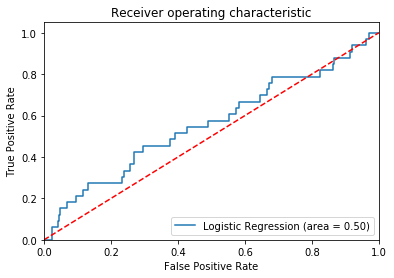

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(internal_y_test, log_reg_model_2.predict(internal_x_test))
fpr, tpr, thresholds = roc_curve(internal_y_test, log_reg_model_2.predict_proba(internal_x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()